In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
# Simulate brownian bridge on a nuniform time grid
# Time grid: t_0, ..., t_n, with uniform spacing (t_0 - t_n)/n
# Value at t_0 is BB_start; Value at t_n is BB_end.

# Condition
BB_start = 0
BB_end = 1
t_0 = 0
t_n = 1
n = 100

# set Brownian Bridge path and assign values
BB = np.zeros(n+1)
BB[0]=BB_start
BB[n]=BB_end

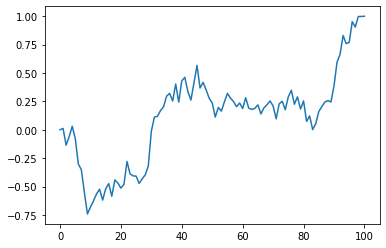

In [131]:
#np.random.seed(10)
for i in range(1,len(BB)-1):
    t = i/n
    s = (i-1)/n
    mean = ((1-t) * BB[i-1] + (t-s)*BB[n])/(1-s)
    sd = np.sqrt((t-s)*(1-t)/(1-s))
    BB[i] = mean + sd * np.random.randn()

plt.plot(BB)

In [42]:
##### ORIE 5582 Home Work Brownian Bridge
# Generate a sample path from a standard Brownian motion over the times t_0 = 0; t_1 = 1/100; ..., t_100 = 1
# conditioned on W(t_50) = 0 and W(t_100) = 1. 

In [136]:
BB_start = 0 # initial point value
BB_mid = 0 # middle point value
BB_end = 1 # last point value
t_0 = 0
t_n = 1
mid = 50 #middle point
n = 100 # last point

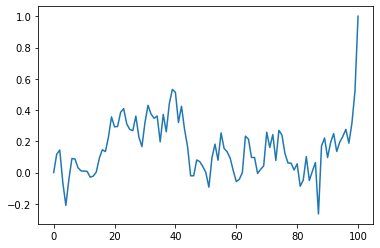

In [137]:
#  component
timestep = (t_n - t_0)/n # timestep
t_mid = t_0 + timestep*mid

BB = np.zeros(n+1)
BB[0] = BB_start
BB[n] = BB_end
BB[mid] = BB_mid

# Simulation

for i in range(1,len(BB)-1):
    t = t_0 + timestep * i  # this step's time index
    s = t - timestep # last step's time index (i.e. one timestep before)
    if t < t_mid:
        mean = ((t_mid-t)*BB[i-1] + (t-s)*BB[mid])/(t_mid - s)
        sd = np.sqrt((t-s)*(t_mid-t)/(t_mid-s))
    if t > t_mid:
        mean = ((t_n - t)*BB[i-1] + (t-s)*BB[n] / (t_n - s))
        sd = np.sqrt((t-s)*(t_n - t)/(t_n - s))
    if i != mid:
        BB[i] = mean + sd*np.random.randn()
        
plt.plot(BB)    

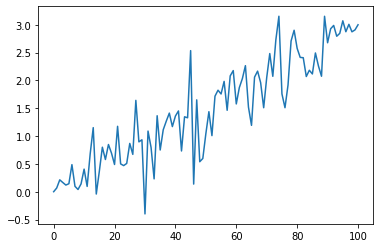

In [138]:
n = 100
t_0 = 0
t_n = 1

BB_start = 0
BB_end = 3
timestep = (t_n - t_0)/n

BB = np.zeros(n+1)
BB[0] = BB_start
BB[n] = BB_end

for i in range(1,len(BB)-1):
    t = t_0 + timestep * i
    mean = BB_start + (t - t_0)/(t_n - t_0)*(BB_end - BB_start)
    sd = np.sqrt((t_n - t)*(t - t_0)/(t_n - t_0))
    BB[i] = mean + sd * np.random.randn()

plt.plot(BB)